In [66]:
import pandas as pd
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from getphone_functions_3 import analyze_numbers
from getphone_functions_3 import is_healthy
from getphone_functions_8 import variable_breakdown

In [3]:
getphone = pd.read_csv('GetPhone_NoContact_Sample.csv')
wslive = pd.read_csv('WSLive_NoContact_Sample.csv')

In [7]:
wslive = wslive[['PHYSICIAN_ME_NUMBER', 'PHYSICIAN_FIRST_NAME', 'PHYSICIAN_MIDDLE_NAME',
       'PHYSICIAN_LAST_NAME', 'SUFFIX', 'DEGREE', 'OFFICE_ADDRESS_LINE_1',
       'OFFICE_ADDRESS_LINE_2', 'OFFICE_ADDRESS_CITY', 'OFFICE_ADDRESS_STATE',
       'OFFICE_ADDRESS_ZIP',
       'OFFICE_TELEPHONE']]

In [15]:
matched_df = pd.merge(wslive, getphone, left_on='OFFICE_TELEPHONE', right_on= 'Number').drop_duplicates(['PHYSICIAN_ME_NUMBER','OFFICE_TELEPHONE'])

In [32]:
list(matched_df.SICDesc.unique())

[nan,
 'OFFICES AND CLINICS OF MEDICAL DOCTORS',
 'OFFICES AND CLINICS OF MEDICAL DOCTORS,HUMAN RESOURCE CONSULTING SERVICES',
 'ENDOCRINOLOGIST,MEDICAL INSURANCE ASSOCIATIONS,OFFICES AND CLINICS OF PODIATRISTS',
 'ENDOCRINOLOGIST,GENERAL MEDICAL AND SURGICAL HOSPITALS,OFFICES AND CLINICS OF MEDICAL DOCTORS',
 'OFFICES AND CLINICS OF MEDICAL DOCTORS,OFFICES OF HEALTH PRACTITIONER',
 'OFFICES AND CLINICS OF MEDICAL DOCTORS,OFFICES AND CLINICS OF PODIATRISTS',
 'OFFICES AND CLINICS OF MEDICAL DOCTORS,PSYCHIATRISTS AND PSYCHOANALYSTS,OFFICES OF HEALTH PRACTITIONER,OFFICES AND CLINICS OF PODIATRISTS,OFFICES AND CLINICS OF OSTEOPATHIC PHYSICIANS,HEALTH AND ALLIED SERVICES, NEC',
 'GENERAL MEDICAL AND SURGICAL HOSPITALS,OFFICES AND CLINICS OF MEDICAL DOCTORS',
 'GENERAL MEDICAL AND SURGICAL HOSPITALS,OFFICES OF HEALTH PRACTITIONER',
 'ENDOCRINOLOGIST,PSYCHIATRISTS AND PSYCHOANALYSTS,OFFICES AND CLINICS OF OPTOMETRISTS,OFFICES AND CLINICS OF PODIATRISTS,PSYCHIATRIST,PSYCHIATRIC CLINIC',
 'GEN

In [ ]:
medical
clinic


In [28]:
list(matched_df['Name'])

['JOAN MCLAIN',
 'AUSTIN REGIONAL CLINIC',
 'SAMARITAN VILLAGE INC',
 'SCOTT D GLAZER',
 'ALABAMA STATE OF',
 'AVIATION RECRUITING PERSONNEL CONSULTANTS',
 'UNIV OF LOUISVI',
 'KAISER PERMANENTE HEALTH CARE HEALTH MAINTENANCE',
 'QUEST DIAGNOSTICS INCORPORATED',
 'KAISER PERMANENTE',
 'V A CLINIC SJ',
 'GWENDELYN SIMPSON',
 'FOX CHASE CANCE',
 'MARVIN PRINCE MD PHYSICIANS GENERAL',
 'ARNOLD GORIN MD PHYSICIANS GENERAL',
 'SCL HEALTH',
 'SURGICAL SPECIALISTS PC PHYSICIANS SURGEONS',
 'JEFFREY ZIMMERMAN MD PHYSICIANS SURGEONS',
 'MULTICARE HEALT',
 'SHARON FANG',
 'BANNER DESERT MEDICAL CENTER',
 'RUTKUMAR P JANI MD PHYSICIANS SURGEONS FAMILY',
 'TAMIKA R WILLIAMS',
 'ALBANY MEDICAL',
 'TRINITAS REGIONAL MEDICAL CENTER HOSPITALS',
 'BRIAN BRADLEY',
 'PATRICIA CURTIS',
 'HARDEN HEALTH',
 'LAUREL S BAY',
 'U CSF MEDICAL CENTER UCSF CHILDRENS HOSPITAL',
 'HOLLYWOOD FLORIST AND GIFTS FLOWERS FLORISTSGIFT',
 'BRIAN SOKALSKY DO PHYSICIANS SURGEONS',
 'PRIMARY CARE CENTER UNIVERSITY CITY PHYSIC

In [57]:
matched_df.to_csv('GetPhone_Humach_Match.csv', index=False)

In [33]:
matched_df.columns

Index(['PHYSICIAN_ME_NUMBER', 'PHYSICIAN_FIRST_NAME', 'PHYSICIAN_MIDDLE_NAME',
       'PHYSICIAN_LAST_NAME', 'SUFFIX', 'DEGREE', 'OFFICE_ADDRESS_LINE_1',
       'OFFICE_ADDRESS_LINE_2', 'OFFICE_ADDRESS_CITY', 'OFFICE_ADDRESS_STATE',
       'OFFICE_ADDRESS_ZIP', 'OFFICE_TELEPHONE', 'Number', 'Name', 'Address',
       'Zipcode', 'City', 'State', 'PhoneType', 'QualityScore', 'Date',
       'Notes', 'Provider', 'SICCode', 'SICDesc'],
      dtype='object')

In [47]:
analyze_numbers(matched_df)

{'Address Matches': 172,
 'City Matches': 293,
 'ZipCode Matches': 226,
 'No Address': 6,
 'No Date': 1,
 'Relevant Name': 290,
 'Business Phone': 399,
 'Residential Phone': 87,
 'Low Quality': 176,
 'Medium Quality': 76,
 'High Quality': 241,
 'Mailable': 331,
 'Connected': 311,
 'Ported': 350,
 'Unknown Contact': 5,
 'Possibly Disconnected': 42,
 'Possibly Portable VOIP': 37,
 'Wireless': 7,
 'First Name Match': 44,
 'Last Name Match': 41,
 'Workplace Match': 20,
 'State Match': 391,
 'No Name': 6,
 'Relevant SIC': 0}

In [52]:
count =0
for row in matched_df.itertuples():
    if is_healthy(row.SICDesc) == True:
        count += 1
        print(row.SICDesc)
print(count)

OFFICES AND CLINICS OF MEDICAL DOCTORS
OFFICES AND CLINICS OF MEDICAL DOCTORS,HUMAN RESOURCE CONSULTING SERVICES
ENDOCRINOLOGIST,MEDICAL INSURANCE ASSOCIATIONS,OFFICES AND CLINICS OF PODIATRISTS
ENDOCRINOLOGIST,GENERAL MEDICAL AND SURGICAL HOSPITALS,OFFICES AND CLINICS OF MEDICAL DOCTORS
OFFICES AND CLINICS OF MEDICAL DOCTORS,OFFICES OF HEALTH PRACTITIONER
OFFICES AND CLINICS OF MEDICAL DOCTORS,OFFICES AND CLINICS OF PODIATRISTS
OFFICES AND CLINICS OF MEDICAL DOCTORS
OFFICES AND CLINICS OF MEDICAL DOCTORS,OFFICES OF HEALTH PRACTITIONER
OFFICES AND CLINICS OF MEDICAL DOCTORS,PSYCHIATRISTS AND PSYCHOANALYSTS,OFFICES OF HEALTH PRACTITIONER,OFFICES AND CLINICS OF PODIATRISTS,OFFICES AND CLINICS OF OSTEOPATHIC PHYSICIANS,HEALTH AND ALLIED SERVICES, NEC
GENERAL MEDICAL AND SURGICAL HOSPITALS,OFFICES AND CLINICS OF MEDICAL DOCTORS
OFFICES AND CLINICS OF MEDICAL DOCTORS
GENERAL MEDICAL AND SURGICAL HOSPITALS,OFFICES OF HEALTH PRACTITIONER
OFFICES AND CLINICS OF MEDICAL DOCTORS
ENDOCRINOLOGIST,

In [56]:
matched_df = matched_df.fillna('None')

In [71]:
variable_df = pd.DataFrame(variable_breakdown(matched_df))

In [62]:
matched_df

,PHYSICIAN_ME_NUMBER,PHYSICIAN_FIRST_NAME,PHYSICIAN_MIDDLE_NAME,PHYSICIAN_LAST_NAME,SUFFIX,DEGREE,OFFICE_ADDRESS_LINE_1,OFFICE_ADDRESS_LINE_2,OFFICE_ADDRESS_CITY,OFFICE_ADDRESS_STATE,...,Zipcode,City,State,PhoneType,QualityScore,Date,Notes,Provider,SICCode,SICDesc
0,4.706051e+09,EIMAN,None,JAHANGIR,None,None,CARDIOLOGY DEPARTMENT,1215 21ST AVE S,NASHVILLE,TN,...,None,None,None,RESIDENTIAL,MED,2013-11-17,"IsPorted,IsWireless",VERIZON WIRELESS-CA,None,None
1,4.814001e+09,SARAH,L,JONES,None,None,AUSTIN REGIONAL CLINIC,1807 W SLAUGHTER LN STE 490,AUSTIN,TX,...,78751,AUSTIN,TX,BUSINESS,MED,2003-12-11,"IsConnected,IsPorted",SOUTHWESTERN BELL,None,None
2,3.515961e+09,RACHAEL,None,GITTENS,None,None,CORNERSTONE OF MEDICAL ARTS CENTER,15905 UNION TPKE,FRESH MEADOWS,NY,...,11201,BROOKLYN,NY,BUSINESS,LOW,2017-02-01,IsPorted,CABLEVSN LGHTPATH NY,None,None
3,1.606781e+09,SCOTT,DAVID,GLAZER,None,None,KENOSHA DERMATOLOGY ASSOCIATES,3734 7TH ST STE 22,KENOSHA,WI,...,60089-2089,BUFFALO GROVE,IL,RESIDENTIAL,HIGH,2018-10-12,"IsMailable,IsConnected,IsPorted",COMCAST PHONE-IL,80110000,OFFICES AND CLINICS OF MEDICAL DOCTORS
4,3.509872e+09,GRACE,HELEN,THOMAS,None,None,AL DEPT OF PUBLIC HEALTH,201 MONROE ST STE 1382,MONTGOMERY,AL,...,36104,MONTGOMERY,AL,BUSINESS,LOW,None,None,BELLSOUTH SO CNTL,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
511,7.480290e+10,MICHELLE,None,ABIS,None,None,# 1001,6511 SPRING BROOK AVE,RHINEBECK,NY,...,12572,RHINEBECK,NY,BUSINESS,LOW,2016-04-08,IsPorted,PAETEC COMM - NY,None,None
512,3.608111e+09,MATTHEW,LEIGHTON,DRAUGHON,None,None,# 104,3615 19TH ST,LUBBOCK,TX,...,79410-1230,LUBBOCK,TX,BUSINESS,LOW,2017-01-25,"IsMailable,IsPorted",TELEPORT COM DALLAS,None,None
513,4.201600e+09,JOSE,L,CANGIANO-RIVERA,None,None,URB LOS INGENIEROS,313 CALLE MANUEL DOMENECH STE 101,SAN JUAN,PR,...,00901,SAN JUAN,PR,RESIDENTIAL,LOW,2016-05-04,IsPorted,LIBERTY CABLEVSN-PR,None,None
514,3.844011e+09,ASLAM,MOHAMMED,KHAJA,None,None,RM 855N MC 796,912 S WOOD ST,CHICAGO,IL,...,60010-2542,LAKE BARRINGTON,IL,BUSINESS,HIGH,2013-12-06,"IsMailable,IsConnected,IsPorted","ACCESS ONE, INC IL",None,None


In [126]:
from sklearn.cluster import KMeans
import numpy as np

kmeans = KMeans(n_clusters=3, random_state=0).fit(attempt_1)


In [73]:
kmeans

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [78]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs



TypeError: scatter() missing 1 required positional argument: 'y'

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Address Match vs. High Quality')

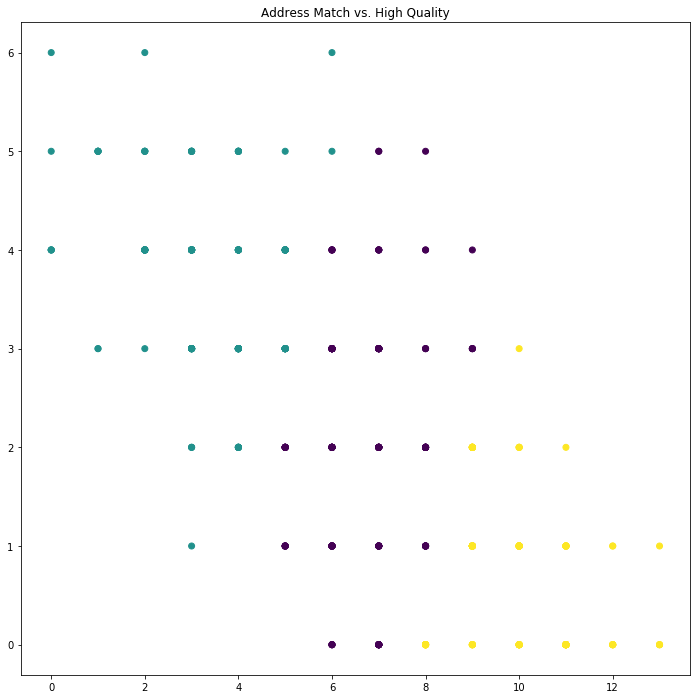

In [130]:
plt.figure(figsize=(12, 12))



plt.scatter(good_score, bad_score, c= list(kmeans.labels_))
plt.title("Address Match vs. High Quality")


In [116]:
matched_df['Label'] = kmeans.labels_

In [86]:
x_1 = list(variable_df['Address Match'])
x_2 = list(variable_df['Address Match'])

In [96]:
bad_things =[]
for thing in list(variable_df.columns):
    if thing not in good_things:
        bad_things.append(thing)

In [123]:
good_things = ['Address Match', 'Business Phone', 'City Match','Connected','First Name Match', 'High Quality', 'Last Name Match', 'Mailable', 'Ported','Relevant Name', 'Relevant SIC','State Match','Workplace Match', 'ZipCode Match']
bad_things.append('Medium Quality')

In [124]:

good_score = 0
bad_score = 0
for thing in good_things:
    good_score += variable_df[thing]
for thing in bad_things:
    bad_score += variable_df[thing]

In [122]:
variable_df['Medium Quality'] = variable_df['Medium Quality']*0.5

In [125]:
attempt_1 = pd.DataFrame([good_score,bad_score]).transpose()

In [120]:
matched_df.to_csv('Investigate.csv')

In [128]:
good_things

['Address Match',
 'Business Phone',
 'City Match',
 'Connected',
 'First Name Match',
 'High Quality',
 'Last Name Match',
 'Mailable',
 'Ported',
 'Relevant Name',
 'Relevant SIC',
 'State Match',
 'Workplace Match',
 'ZipCode Match']

In [129]:
bad_things

['Disconnected',
 'INF',
 'Low Quality',
 'Medium Quality',
 'No Address',
 'No Provider',
 'NO SIC',
 'No Date',
 'Possibly Portable VOIP',
 'Residential Phone',
 'Toll free',
 'Unknown Contact',
 'Unknown Phone Type',
 'Wireless note',
 'VOIP',
 'Medium Quality']

In [ ]:
variable_df

In [ ]:
matched_df.to